In [5]:
from sklearn.datasets import make_classification
import numpy as np
X,Y = make_classification(n_samples=100, n_features=2,n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class = 1, random_state=41, hypercube=False,class_sep=20)

In [6]:
import matplotlib.pyplot as plt

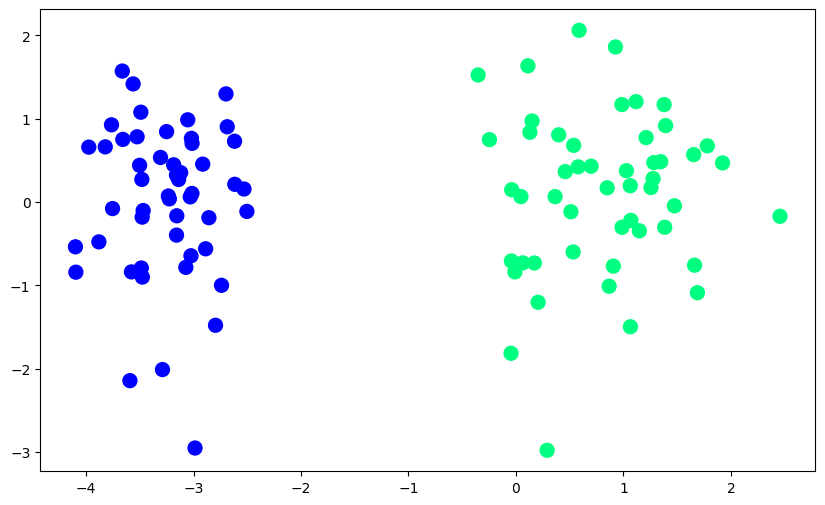

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)

In [9]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')# penatly = none, noregularization is applied, solver=algorithms for implementing Logistic
lor.fit(X,Y)

/home/jatin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/jatin/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [10]:
print(lor.coef_)

[[4.79933718 0.21313887]]


In [11]:
print(lor.intercept_)

[5.77234409]


In [12]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [13]:
m1

-22.517418998764562

In [14]:
b1


array([-27.0825503])

In [15]:
x_input = np.linspace(-3,3,100) # ploting line segment
y_input = m1*x_input + b1

In [19]:
X

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163],
       [-2.53070306,  0.15599044],
       [-3.49036198,  1.07782053],
       [ 0.3976447 ,  0.80626713],
       [-0.24666899,  0.74859527],
       [-3.65803446,  0.75152794],
       [-3.47658131, -0.90114581],
       [-3.47815037, -0.1815243 ],
       [ 0.29004249, -2.98092432],
       [ 1.11761831,  1.20500136],
       [-3.52530398,  0.78302407],
       [ 0.69929128,  0.42968688],
       [ 0.17089733, -0.73229726],
       [-3.57785124, -0.83930476],
       [ 0.12965489,  0.83727062],
       [-3.46888717, -0.10255323],
       [-3.97487212,  0.65867001],
       [-3.76348686,  0.92649819],
       [-3.01519735,  0.10216193],
       [ 1.92241659,  0.46886454],
       [-2.91479578,  0.45432938],
       [ 0.9259563 ,  1.8613386 ],
       [-3.4859014 , -0.79255991],
       [-2.73978345, -1.0004391 ],
       [-4.09896768,

In [20]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [22]:
X1 = np.insert(X,0,1,axis=1)
weights_1 = np.ones(X1.shape[1])
weights_1 # [w0,w1,w2]

array([1., 1., 1.])

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [26]:
def logistic_gradient_descent(X,Y): # Batch Gradient Descent
    X  = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(2500):
        y_hat = sigmoid(np.dot(X,weights)) # Vectorizaton
        weights = weights = weights + lr*(np.dot((Y-y_hat),X))/X.shape[0]
    
    return weights[1:],weights[0]


In [27]:
coef_,intercept_= logistic_gradient_descent(X,Y)

In [28]:
coef_

array([4.36410145, 0.17189254])

In [29]:
intercept_

5.148029492159727

In [30]:
m =  -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [32]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

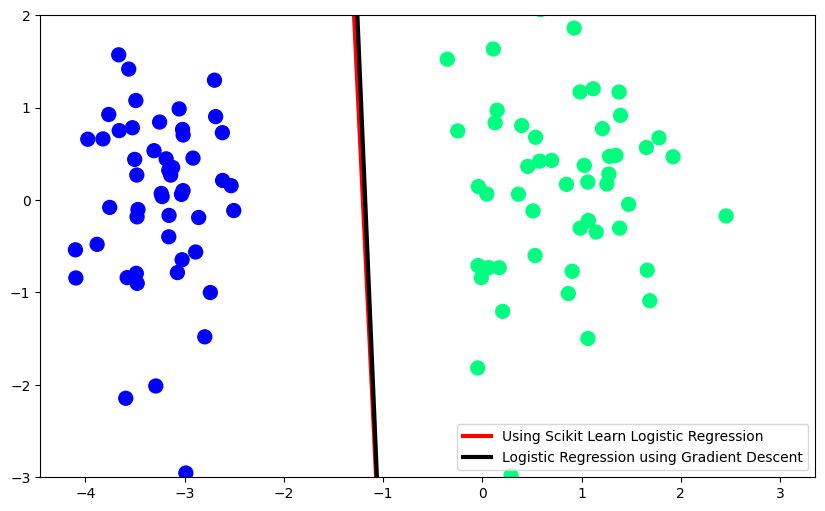

In [33]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Using Scikit Learn Logistic Regression')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label = 'Logistic Regression using Gradient Descent')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend(loc='best')
plt.show()

## Note:
      1. Reason for still difference might be epoches or the solver internally used by them.


In [ ]:
#